# Subbundles

**Subbundle** - a subgroup of streamlines with a set of common properties


Subbundles should be:

- Substantially different

  *[Otsu’s criterium](https://en.wikipedia.org/wiki/Otsu%27s_method)* 
  
  - variance within subbundle small

  - variance across subbundles large
  
- [Reliable](https://en.wikipedia.org/wiki/Reliability_(statistics)) across individuals


### Objective

[Unsupervised learning](https://en.wikipedia.org/wiki/Cluster_analysis) applied to [white matter bundles](https://en.wikipedia.org/wiki/Nerve_tract) to identify candidate subbundles


## Targeting Conference Abstract Deadlines 


- [**(OHBM) Organization for Human Brain Mapping**](https://www.humanbrainmapping.org/i4a/pages/index.cfm?pageid=4024)

December 19, ?


- [(ISMRM) International Society for Magnetic Resonance in Medicine](https://www.ismrm.org/21m/)

16 December 2020 at 23:59 EST

  - focused on general MRI methodology


Working backwards **want some reliable results within next few weeks**

In [1]:
import os.path as op

import numpy as np
import pandas as pd

import scipy.cluster.hierarchy as spc

In [2]:
import nibabel as nib

from dipy.io.stateful_tractogram import StatefulTractogram, Space
from dipy.io.streamline import load_tractogram, save_tractogram 
from dipy.tracking.streamline import set_number_of_points, values_from_volume

from AFQ import api
import AFQ.data as afd

/Users/bloomdt/anaconda/envs/subbundles/lib/python3.8/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import matplotlib.pyplot as plt
import plotly
from dipy.viz import window, actor

from IPython.display import Image

## Datasets

0. Simulated data (*optional*)

1. High Angular Resolution Diffusion MRI (HARDI) [<sup>1</sup>](https://figshare.com/articles/dataset/pyAFQ_Stanford_HARDI_tractography_and_mapping/3409882) [<sup>2</sup>](https://searchworks.stanford.edu/view/yx282xq2090)

2. Human Connectome Project ([HCP](http://www.humanconnectomeproject.org)) [<sup>1</sup>](https://www.humanconnectome.org/study/hcp-young-adult/document/1200-subjects-data-release)

### <span style="color:red">NOTE: By default assumes dataset exists, otherwise:</span>

- **Enable and run approriate cell to download the desired dataset**

### 1. HARDI

Single subject single session

### 2. HCP

Single subject single session

**NOTE: Selected subject 100307 as exemplar from [HCP 1200 Subjects Data Release Reference Manual](https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf)**

**TODO**

- [ ] talk to John about HCP data

## Generate Tract Profiles

1. Single individual from HARDI dataset

2. Multiple individuals from HARDI dataset

3. Multiple individuals from HCP dataset

**NOTE: Number of individuals depends on the number of subject in `bids_path`**


### <span style="color:red">NOTE: By default uses HARDI dataset</span>

- **Disable/Enable and run appropriate cell for desired dataset**

### 1. Individual(s) from HARDI dataset

In [4]:
myafq = api.AFQ(
    bids_path=op.join(afd.afq_home, 'stanford_hardi'),
    dmriprep='vistasoft'
)

INFO:dipy.data.fetcher:Dataset is already in place. If you want to fetch it again please first remove the folder /Users/bloomdt/AFQ_data/templates 
INFO:dipy.data.fetcher:Dataset is already in place. If you want to fetch it again please first remove the folder /Users/bloomdt/AFQ_data/callosum_templates 
/Users/bloomdt/anaconda/envs/subbundles/lib/python3.8/site-packages/bids/layout/models.py:98: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  warnings.warn("The 'extension' entity currently excludes the leading dot ('.'). "


### 2. Individual(s) from HCP dataset

### Segmentation

### <span style="color:red">By default assumes segmentation artifacts exist, otherwise:</span>

- **Enable and run cells to segment and visualize bundles and tract profiles**

## Bundles

0. Fornix (from QuickBundle example)
1. SLF
2. Corpus Callosum
3. Novel bundle
4. Whole brain

### Get Tractogram File

### <span style="color:red">By default use pyAFQ tractogram, otherwise:</red>

- **Enable and run cells to use Fornix from dipy**

  - useful if interested in baseline comparison to QuickBundle
  

#### 0. Fornix

**TODO: Verify have Tissue properties for Fornix**

#### 1. SLF - *superior longitudinal fasciculus* (reproduce)

- Grotheer, M., Zhen, Z., Lerma-Usabiaga, G., & Grill-Spector, K. (2019). Separate lanes for adding and reading in the white matter highways of the human brain. Nature communications, 10(1), 1-14.

  https://www.nature.com/articles/s41467-019-11424-1

- Schurr, R., Zelman, A., & Mezer, A. A. (2020). Subdividing the superior longitudinal fasciculus using local quantitative MRI. NeuroImage, 208, 116439.

  https://www.sciencedirect.com/science/article/pii/S1053811919310304
  
- De Schotten, M. T., Dell’Acqua, F., Forkel, S., Simmons, A., Vergani, F., Murphy, D. G., & Catani, M. (2011). A lateralized brain network for visuo-spatial attention. Nature Precedings, 1-1.

  https://www.nature.com/articles/npre.2011.5549.1
  https://www.researchgate.net/publication/281573090_A_lateralized_brain_network_for_spatial_attention

### <span style="color:red">By default use SLF_L bundle, otherwise:</red>

- **Change `bundle_name`**

  - pyAFQ segmentation was run with default bundles. To determine valid names can either:
  
     - refer to [documentation](https://yeatmanlab.github.io/pyAFQ/), or 
     
     - inspect the `myafq.bundle_dict` object

In [5]:
bundle_name='SLF_L'

row = myafq.data_frame.iloc[0]

bundles_dir = op.join(row['results_dir'], 'bundles')

fname = op.split(
    myafq._get_fname(
        row,
        f'-{bundle_name}'
        f'_tractography.trk',
        include_track=True,
        include_seg=True
    )
)

tg_fname = op.join(bundles_dir, fname[1])

print(bundle_name,"tractogram file:", tg_fname)

SLF_L tractogram file: /Users/bloomdt/AFQ_data/stanford_hardi/derivatives/afq/sub-01/ses-01/bundles/sub-01_ses-01_dwi_space-RASMM_model-DTI_desc-det-AFQ-SLF_L_tractography.trk


#### 2. Corpus callosum tract profiles (baseline)

#### TODO: Corpus callosum tractometry

- define ROIs

  - use midsaggital inclusion ROI and through midline
  
  - union of all callosum bundles

#### 3. Novel fiber bundles (predictive)

where results are less established

#### 4. Whole Brain Tractometry

### Get Streamlines

In [6]:
tractogram = load_tractogram(tg_fname, 'same')# , bbox_valid_check=False)
streamlines = tractogram.streamlines
print("streamlines:", len(streamlines))

streamlines: 465


In [7]:
affine = tractogram.affine
print(affine)

[[   2.    0.    0.  -80.]
 [   0.    2.    0. -120.]
 [   0.    0.    2.  -60.]
 [   0.    0.    0.    1.]]


## QuickBundles

https://dipy.org/documentation/1.2.0./examples_built/segment_quickbundles/#example-segment-quickbundles

Why QuickBundles:

- QuickBundles is a use for baseline comparison

- Considering using Quickbundle MDF as geometric distance metric

### Run QuickBundles

clustering using the MDF metric and a 10mm distance threshold

**TODO: Find out if can retrieve MDF from `qb` object**

- already calculated
  
- might be able to resuse efficent code

diagnostic information about the clustering result

diagnostic plot first streamline from first cluster

show the bundle (colors from centroids)

## Generate Streamline Tract Profiles

**TODO: Quantify *Stability* and *Robustness* of resulting tract profiles**

### Streamline Tract Profile Metrics

- Calculate Streamline Tract Profiles, using various Tissue Properties:

  - **[FA](https://en.wikipedia.org/wiki/Fractional_anisotropy) (*Fractional Anisotropy*)**
  
  - **MD (*Mean Diffusivity*)**
  
  - APM (*Anisotropic Power Map*)
 
- Geometrically Constrained (Distance)

  - Euclidean
  
  - QuickBundle MDF (*Minimum Average Direct Flip*)


#### Other Tissue Properties

- [Relaxometry](https://radiopaedia.org/articles/relaxometry?lang=us)-based parameter


- Quantitative T<sub>1</sub> (*NOTE: May not exist for HCP dataset*)
  
- T<sub>1</sub>/T<sub>2</sub> ratio (*NOTE: May not exist for HARDI dataset*)
    
    
- quantitative measures (T1, T2, T2*)
  
- semi-quantitative measures (T2-weighted/T1-weighted ratio (T2w/T1w))

### Get Tissue Properties (Scalar Data)

Diagnostic information:

Mistakenly looking for tissue properties in tractogram:

(keeping for now for historical purposes)

- There is no data in pyAFQ bundle tractogram file

- The only data in the main pyAFQ tractogram file is the bundle identifier

- To determine what bundle identifier corresponds to `bundle_name` inspect `bundle_dict`

**TODO: Automatically use all available scalars**

### <span style="color:red">By default use FA, otherwise:</red>

- **Disable/Enable and run MD cell**

In [8]:
scalar_file = myafq._get_fname(
    row,
    f'_model-DTI_FA.nii.gz'
)

print(scalar_file)

scalar_data = nib.load(scalar_file).get_fdata()

/Users/bloomdt/AFQ_data/stanford_hardi/derivatives/afq/sub-01/ses-01/sub-01_ses-01_dwi_model-DTI_FA.nii.gz


### Streamline Profiles

Calculate tissue properties per streamline

For reference:
- https://github.com/dipy/dipy/blob/master/dipy/tracking/streamline.py#L668

  - https://github.com/dipy/dipy/blob/master/dipy/stats/analysis.py#L221

#### Bundle Tract Profile

Summarized tissue properties.

Used as example for calculating streamline profile.

(keeping for now for historical purposes)

#### Streamline Profile

**NOTE: Streamlines do not have the same length**

### <span style="color:red">By default sampling `100` points from each streamline</span>

- The choice of `n_points` by convenction, however want to ensure it is greater than minimum number in `streamlines`.

- There are several approaches to align streamlines, and these choices can affect results.

In [9]:
n_points = 100
fgarray = set_number_of_points(streamlines, n_points)
values = np.array(values_from_volume(scalar_data, fgarray, affine))
print(values)

[[0.21622381 0.2705829  0.33299403 ... 0.25920407 0.27066547 0.20629653]
 [0.20348186 0.24565254 0.30600664 ... 0.28250741 0.24818694 0.21115255]
 [0.20385597 0.23191743 0.26918901 ... 0.27723545 0.26349754 0.2273314 ]
 ...
 [0.2234561  0.29100039 0.3102349  ... 0.32232922 0.2835963  0.22808719]
 [0.22813402 0.26913598 0.27248162 ... 0.27560819 0.24418002 0.21394383]
 [0.20290428 0.23889827 0.26283582 ... 0.34387642 0.30092561 0.21896093]]


In [10]:
print(values.shape)
print(len(values)==len(streamlines))

(465, 100)
True


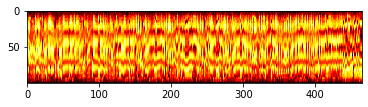

In [11]:
plt.imshow(values.T, cmap='hot', interpolation='nearest')
plt.show()

## Distance/Adjacency Matrix of Streamline Correlations

- NxN matrix of coorelations of streamline tract profiles
  
  - single matrix and single metric
  
  - **single matrix and multiple metrics (weighted linear combination)**
    
    - manually stacked 
      
    - learn hyperparameters
      
  - multiple matrices (tensor) and multiple metrics

### Streamline Correlations

In [12]:
df = pd.DataFrame(values.T)
corr = df.corr()
print(corr.shape)

(465, 465)


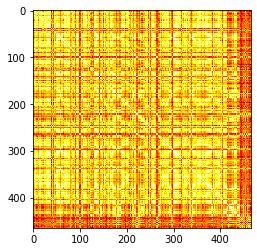

In [13]:
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.show()

### Distance Metrics

Given: 

- NxN streamlines 

Assuming:

- same subject

- same streamlines

Anything varies streamlines would violate assumptions:

- comparing subjects

- using different tractometry, segmentation, or metrics

Want:

- a distance metric that is similar to correlation

  - bounded between 0 and 1
  
  - 0 signifies streamlines are infinitely far apart
  
  - 1 signifies same streamline

Consider: 

- MDF between every pair

- Threshold distance $\theta$

  - If distance is greater than threshold then streamlines are considered infinitely far apart (not part of the same subbundle)


##### [Bundle Adjacency (BA)](https://www.nature.com/articles/s41598-020-74054-4)

> Use bundle adjacency (BA) to calculate the shape similarity between the same type of bundles **across subjects and groups** ... BA uses a minimum direct flip (MDF) distance to get the distance between two streamlines

> 𝐵𝐴(𝐵1,𝐵2)=0.5(𝑐𝑜𝑣𝑒𝑟𝑎𝑔𝑒(𝐵1,𝐵2)+𝑐𝑜𝑣𝑒𝑟𝑎𝑔𝑒(𝐵2,𝐵1))

### Compare Adjacency Matricies

**TODO**

Once get streamline correlation matricies:

- Check how much information is shared (mutual information: $I(X,Y)$ or alternatively sum of conditional information -- only present in one of the matricies: $H(X,Y)-I(X,Y)=H(Y|X)+H(X|Y)$)

  - Begin with "eye-ball comparison" between FA and MD matrices

  - Then consider difference of adjacency matrices

**NOTE: we are assuming that streamlines are same (from same individual and same same tractography)**

## Permute/reorder matrix by similarity

- this becomes convex optimization problem

- many clustering algorithms would work for this setup

### Dimensionality Reduction

- [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) (*Principle Component Analysis*)

### Clustering

- For every streamline assign class given collection in unsupervised manner

  - Then label clusters
    
    - To identify number of clusters use empirical test like F-test

- [Spectral Clustering](https://en.wikipedia.org/wiki/Spectral_clustering) in [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

### Create Clusters

In [14]:
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')

print("number of clusters:", len(np.unique(idx)))

number of clusters: 8


Resort the matrix based on cluster

In [15]:
columns = [df.columns.tolist()[i] for i in list((np.argsort(idx)))]
df = df.reindex(columns, axis=1)
corr = df.corr()

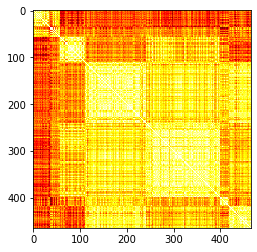

In [16]:
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.show()

### Plot clusters

In [17]:
clusters = np.array([np.where(idx == i)[0] for i in np.unique(idx)])
print("streamlines per cluster:", [clusters[i].size for i in range(clusters.size)])

streamlines per cluster: [36, 4, 17, 53, 130, 158, 20, 47]


#### Visualize clustered streamlines

- Are there any anatomically distinct subbundles?

**TODO: `streamtube` plots are not anatomically oriented**

**TODO: coordinate `colormap` to make subbundle identification consistent**

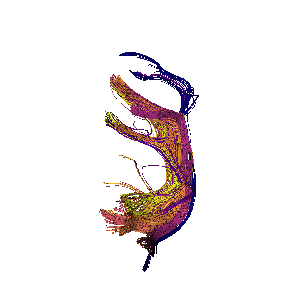

In [18]:
colormap_full = np.ones((len(streamlines), 3))
colormap = actor.create_colormap(np.unique(idx))

for cluster, color in zip(clusters, colormap):
    colormap_full[cluster] = color
    
scene = window.Scene()
scene.SetBackground(1, 1, 1)
scene.add(actor.streamtube(streamlines, colormap_full))
window.record(scene, out_path='clusters.png', size=(300, 300))
Image(filename='clusters.png')

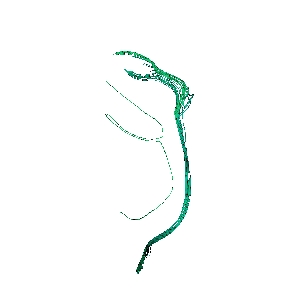

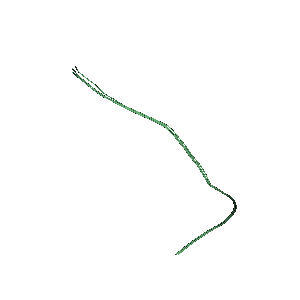

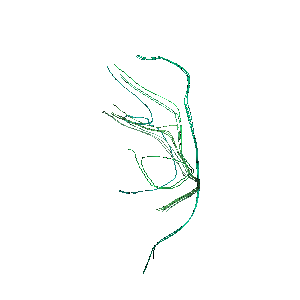

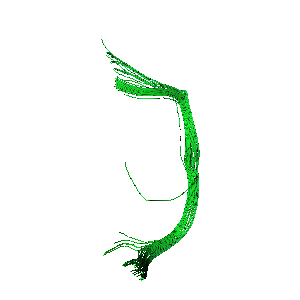

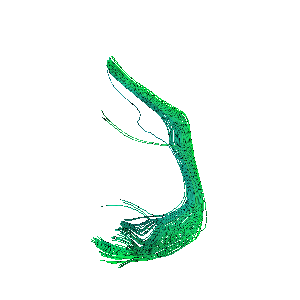

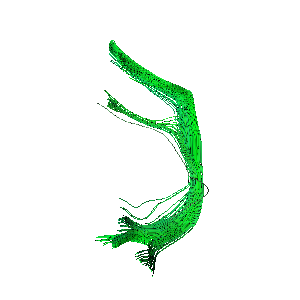

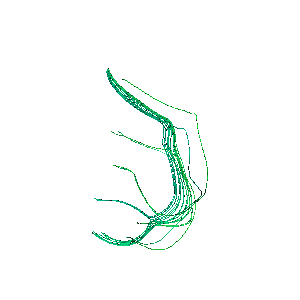

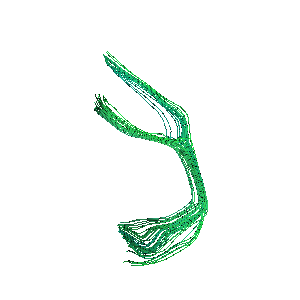

In [19]:
images = []

for i in np.unique(idx):
    scene = window.Scene()
    scene.SetBackground(1, 1, 1)
    scene.add(actor.streamtube(streamlines[clusters[i-1]]))
    window.record(scene, out_path=f'cluster{i-1}.png', size=(300, 300))
    images.append(Image(filename=f'cluster{i-1}.png'))
    
display(*images)

#### Save individual subbundle tractography files